<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Simple_EDA__Rooftop_Drinking_Water_Tank_Inspection_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps to perform EDA (by srikanth bhaiyya) 


1. Univariate Data Analysis :
   -  numercial - check Distribution, plot : boxplot and Histogram, find missing values.
   - categorical - Check freq_distribution and plot : bar chart and pie chart.
   - dates - feature extraction i.e. [hr, day, (week, month[plot:line graph]) &  qtr plot : hist]
   - Find missing values 
   - outliers 
   constant values = only one values i.e dataset will be of 99% with one value but with due to some error 1 % will be another data

2. Multivariate Analysis :
   - numerical vs numerical : plot = scatter plot  
   - categorical vs categorical : plot =  cluster plot or bar chart
   - numerical vs categorical and categorical vs numerical: plot = x-axis [box plot]

3. Sometimes you may need to convert numerical data to categorical data i.e ( in this we will create bins and freq of the data will contain the bin value and will plot as histogram) 


4. Relationships and distributions 
    - if two numericals are present then use corr() or scatterplot 
    - if two categoricals are present the ues association - chi square test 

- distributions 
-  outliers 

- check for type 1 error 
- check for type 2 error


(to read about supply & demand concept), 
( out of control factors )  

In [1]:
from google.colab import files 
uploaded = files.upload()
import io

Saving rooftop-drinking-water-tank-inspection-results-1.csv to rooftop-drinking-water-tank-inspection-results-1.csv


In [3]:
# importing libraries required for data manipulation and data visualization
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['rooftop-drinking-water-tank-inspection-results-1.csv']))


### Rooftop Drinking Water Tank Inspection Results
- NYC Health Code requires that building drinking water storage tanks be inspected annually and that the results of these inspections be reported to the Health Department (NYC DOHMH). To report specific inspection findings related to public safety and sanitary conditions, owners or their representatives fill out a questionnaire provided by DOHMH. This dataset is the non-administrative subset of owner-reported information. Reported data have not been verified by a City Agency

In [5]:
# glimpse of the data 
data.head()

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,INSPECTION_BY_FIRM,INSPECTION_PERFORMED,INSPECTION_DATE,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,GI_RESULT_EXTERNAL_STRUCTURE,GI_REQ_OVERFLOW_PIPES,GI_RESULT_OVERFLOW_PIPES,GI_REQ_ACCESS_LADDERS,GI_RESULT_ACCESS_LADDERS,GI_REQ_AIR_VENTS,GI_RESULT_AIR_VENTS,GI_REQ_ROOF_ACCESS,GI_RESULT_ROOF_ACCESS,SI_REQ_SEDIMENT,SI_RESULT_SEDIMENT,SI_REQ_BIOLOGICAL_GROWTH,SI_RESULT_BIOLOGICAL_GROWTH,SI_REQ_DEBRIS_INSECTS,SI_RESULT_DEBRIS_INSECTS,SI_REQ_RODENT_BIRD,SI_RESULT_RODENT_BIRD,SAMPLE_COLLECTED,LAB_NAME,NYS_CERTIFIED,ANALYTES,COLIFORM,ECOLI,MEET_STANDARDS,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,1034025,MANHATTAN,10024,320,WEST 89 STREET,1250,47,WTI9835953296,2015,1,ISSEKS BROS INC,Y,12/10/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.791082,-73.977107,7.0,6.0,175.0,1.012500e+09,Upper West Side,05/11/2018 12:15:22 PM
1,1087485,MANHATTAN,10038,8,Spruce St.,100,7502,WTI5946705268,2015,2,Isseks Bros Inc,Y,06/24/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions,Y,B,A,A,NaN,40.711407,-74.005573,1.0,1.0,1501.0,1.001008e+09,Battery Park City-Lower Manhattan,05/11/2018 12:15:29 PM
2,1082711,MANHATTAN,10011,455,WEST 23 STREET,721,7,WTI8886837394,2017,1,ISSEKS BROS INC,Y,11/02/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.747141,-74.002840,4.0,3.0,93.0,1.007210e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/11/2018 12:15:29 PM
3,1038647,MANHATTAN,10017,5,Tudor City Place,1333,23,WTI5707518714,2016,1,Isseks Bros. Inc.,Y,12/17/2016,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions LLC,Y,B,A,A,NaN,40.748054,-73.971185,6.0,4.0,88.0,1.013330e+09,Turtle Bay-East Midtown,05/11/2018 12:15:23 PM
4,1088817,MANHATTAN,10022,432,Park Ave,1292,7502,WTI0290447370,2017,1,New York Plumbing,Y,12/08/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Ambient Group,Y,B,A,A,NaN,40.761042,-73.971176,5.0,4.0,11202.0,1.012928e+09,Midtown-Midtown South,05/11/2018 12:15:27 PM


In [12]:
print('The rows and columns present in the dataset are ', data.shape)

The rows and columns present in the dataset are  (13484, 48)


### Data Description :

- BIN :Department of Buildings Building Identification Number
- BOROUGH : Borough of Water tank location
- ZIP : Zip of Water tank location
- HOUSE_NUM	: Number on street of water tank location
- STREET_NAME : street of water tank location
- BLOCK	: DOB block number of water tank location
- LOT : DOB lot number of water tank location
- CONFIRMATION_NUM : Provided by DOHMH upon certification
- REPORTING_YEAR : Reporting inspection year > 2000; < today
- TANK_NUM : Serial listing for multiple tanks ('first' tank = 1, etc.)
- INSPECTION_BY_FIRM = Name of professional inspecting firm
- INSPECTION_PERFORMED=Certifying inspection performed
- INSPECTION_DATE: date of inspection for results being reported
- GI_REQ_INTERNAL_STRUCTURE	: certifying inspection of tank internal structure
- GI_RESULT_INTERNAL_STRUCTURE : Certifying fitness of tank internal structure. N = No Unsanitary Conditions; A = Corrective Action Taken
- GI_REQ_EXTERNAL_STRUCTURE	: certifying inspection of tank external structure

- GI_RESULT_EXTERNAL_STRUCTURE	: Certifying fitness of tank external structure. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_OVERFLOW_PIPES	: certifying inspection of connected pipes

- GI_RESULT_OVERFLOW_PIPES	: Certifying fitness of connected pipes. N = No Unsanitary Conditions. A = Corrective Action Taken

- GI_REQ_ACCESS_LADDERS	: certifying inspection of access ladders

- GI_RESULT_ACCESS_LADDERS : Certifying fitness of access ladders. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_AIR_VENTS : certifying inspection of air vents

- GI_RESULT_AIR_VENTS : Certifying fitness of air vents. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_ROOF_ACCESS : Certifying inspection of roof access

- GI_RESULT_ROOF_ACCESS	: Certifying roof access. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_SEDIMENT:certifying inspection of tank for sediment

- SI_RESULT_SEDIMENT : Certifying condition of sediment. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_BIOLOGICAL_GROWTH	: Certifying inspection for biological growth

- SI_RESULT_BIOLOGICAL_GROWTH : Certifying condition of biological growth. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_DEBRIS_INSECTS	: certifying inspection for tank debris

- SI_RESULT_DEBRIS_INSECTS : Certifying condition re tank debris. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_RODENT_BIRD : certifying inspection of evidence of rodents or birds

- SI_RESULT_RODENT_BIRD	: Certifying condition for rodents or birds. N = No Unsanitary Conditions; A = Corrective Action Taken

- SAMPLE_COLLECTED : certifying water sample was collected

- LAB_NAME : Lab analyzing sample for this inspection

- NYS_CERTIFIED	: Confirming lab certifications

- ANALYTES : describing analysis performed. B = Bacterial; O=Other

- COLIFORM : Certifying lab analysis results for total coliform: A = Absent/None Detected; P = Present

- ECOLI	: Certifying lab analysis results for Ecoli: A = Absent/None Detected; P = Present

- MEET_STANDARDS : Certifying other analysis meets health standards.

- DELETED	
- LATITUDE	: Latitude of the water tank. Values calculated by DOHMH based on information provided in certification

- LONGITUDE	: Longitude of the water tank. Values calculated by DOHMH based on information provided in certification

- COMMUNITY_BOARD : The Community Board field indicates the New York City Community District where the water tank is located. Values calculated by DOHMH based on information provided in certification

- COUNCIL_DISTRICT	: The Council District field indicates the New York City Council District where the water tank is located. Values calculated by DOHMH based on information provided in certification

- CENSUS_TRACT : The Census Tract field indicates the U.S. Census Tract where the water tank is located. Values calculated by DOHMH based on information provided in certification

- BBL : The BBL (Borough, Block, and Lot) is a unique identifier for each tax lot in the City. Values calculated by DOHMH based on information provided in certification

- NTA : The Neighborhood Tabulation Area field indicates the New York City Neighborhood area where the water tank is located. Values calculated by DOHMH based on information provided in certification

- BATCH_DATE : Values calculated by DOHMH based on information provided in certification
Date & Time


In [9]:
# let's see the description of the dataset 
data.describe()

,BIN,ZIP,BLOCK,LOT,REPORTING_YEAR,TANK_NUM,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL
count,1.348400e+04,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13425.000000,13425.000000,13425.000000,13425.000000,13425.000000,1.342400e+04
mean,1.313438e+06,10156.861391,1400.702907,1308.553026,2016.011569,1.270320,40.756632,-73.969617,5.805661,6.894227,3292.247598,1.270498e+09
std,7.700247e+05,360.171788,1419.690313,2817.246492,0.837727,0.831573,0.040509,0.036316,2.856156,8.856212,11076.726650,7.290274e+08
min,1.000000e+06,10001.000000,0.000000,0.000000,2014.000000,1.000000,40.572169,-74.171260,1.000000,1.000000,1.000000,0.000000e+00
25%,1.019876e+06,10016.000000,828.000000,11.000000,2015.000000,1.000000,40.739606,-73.989108,5.000000,3.000000,80.000000,1.008430e+09
50%,1.041088e+06,10022.000000,1231.000000,32.000000,2016.000000,1.000000,40.756924,-73.977582,6.000000,4.000000,124.000000,1.012600e+09
75%,1.079908e+06,10038.000000,1471.000000,67.000000,2017.000000,1.000000,40.776022,-73.961966,8.000000,6.000000,194.000000,1.015083e+09
max,5.157402e+06,11694.000000,16177.000000,9078.000000,2018.000000,13.000000,40.908632,-73.713627,81.000000,49.000000,155101.000000,5.028298e+09


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13484 entries, 0 to 13483
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BIN                           13484 non-null  int64  
 1   BOROUGH                       13484 non-null  object 
 2   ZIP                           13484 non-null  int64  
 3   HOUSE_NUM                     13484 non-null  object 
 4   STREET_NAME                   13484 non-null  object 
 5   BLOCK                         13484 non-null  int64  
 6   LOT                           13484 non-null  int64  
 7   CONFIRMATION_NUM              13484 non-null  object 
 8   REPORTING_YEAR                13484 non-null  int64  
 9   TANK_NUM                      13484 non-null  int64  
 10  INSPECTION_BY_FIRM            13482 non-null  object 
 11  INSPECTION_PERFORMED          13484 non-null  object 
 12  INSPECTION_DATE               13483 non-null  object 
 13  G

In [11]:
# let's check the frequency of dtypes 

data.dtypes.value_counts()

object     36
int64       6
float64     6
dtype: int64

- here we can see the 12 numerical columns and 36 categorical/text columns are present 


### Let's explore the dataset

In [16]:
# let's check if the null values are present ? 
print(data.isnull().sum(), '\n\n')
print('So it is visible that null values are present. with exploring every \
variable we will also deal with the null values')

BIN                                0
BOROUGH                            0
ZIP                                0
HOUSE_NUM                          0
STREET_NAME                        0
BLOCK                              0
LOT                                0
CONFIRMATION_NUM                   0
REPORTING_YEAR                     0
TANK_NUM                           0
INSPECTION_BY_FIRM                 2
INSPECTION_PERFORMED               0
INSPECTION_DATE                    1
GI_REQ_INTERNAL_STRUCTURE          0
GI_RESULT_INTERNAL_STRUCTURE       3
GI_REQ_EXTERNAL_STRUCTURE          0
GI_RESULT_EXTERNAL_STRUCTURE       3
GI_REQ_OVERFLOW_PIPES              0
GI_RESULT_OVERFLOW_PIPES           5
GI_REQ_ACCESS_LADDERS              0
GI_RESULT_ACCESS_LADDERS           6
GI_REQ_AIR_VENTS                   0
GI_RESULT_AIR_VENTS                5
GI_REQ_ROOF_ACCESS                 0
GI_RESULT_ROOF_ACCESS             12
SI_REQ_SEDIMENT                    0
SI_RESULT_SEDIMENT                 3
S

#### UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES 

In [17]:
#BOROUGH : Borough of Water tank location
data['BOROUGH'].value_counts()

MANHATTAN        11722
BROOKLYN           704
BRONX              570
QUEENS             478
STATEN ISLAND       10
Name: BOROUGH, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


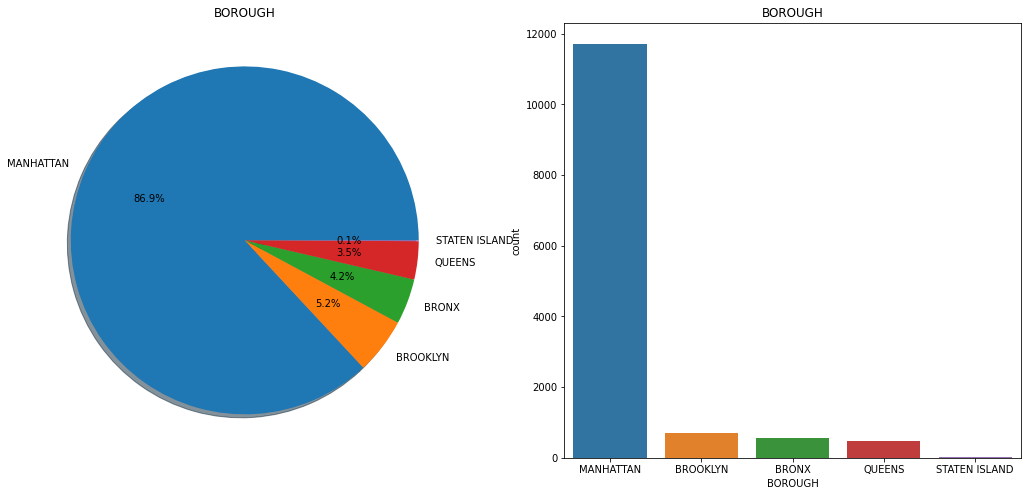

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['BOROUGH'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('BOROUGH')
ax[0].set_ylabel('')
sns.countplot('BOROUGH', data=data, ax=ax[1])
ax[1].set_title('BOROUGH')
plt.show()

- The Manhattan is dominating with 86.7% for presence
- while STATEN ISLAND is only of 0.1% 

In [35]:
# exploring : 

print(data.INSPECTION_BY_FIRM.value_counts())
print("\n\nFrom the value_counts we can see the because of typos there are repeation of the firms now have to change it to the single name")

ROSENWACH TANK CO. LLC                  5883
ISSEKS BROS INC                         2826
ISSEKS BROS. INC.                       1230
AMERICAN PIPE & TANK                     923
ISSEKS BROS., INC.                       235
                                        ... 
ISSEKS  BROS. INC                          1
CHEM AQUA                                  1
AMERICAN PIEP & TANK LINING CO., INC       1
ROCKROSE DEVELOPMENT                       1
FORD TANK MAINTENANCE CO                   1
Name: INSPECTION_BY_FIRM, Length: 326, dtype: int64


From the value_counts we can see the because of typos there are repeation of the firms now have to change it to the single name


ISSEKS BROS INC          2826
ISSEKS BROS. INC.        1230
ISSEKS BROS., INC.        235
ISSEKS BROS. INC           76
ISSEKS BROTHERS, INC.      62
ISSEKS BROTHERS            62
ISSEKS BROS                56
ISSEKS BROS INC.           47
ISSEKS                     42
ISSEKS BROTHERS INC.       36
ISSEKS BROS.               33
ISSEKS BROTHERS INC        21
ISSEKS BROTHERS, INC        9
ISSEKS BROS.INC.            4
ISSEKS BROS, INC            4
ISSEKS BROS. INCL           3
ISSEKS BROS, INC.           2
ISSEKS BROS. INC,           2
ISSEKS.COM                  1
ISSEKS BROS INC,            1
ISSEKS BORS. INC.           1
ISSEKS BROS.COM             1
ISSEKS BROS. CO.            1
ISSEKS  BROS. INC.          1
ISSEKS  BROS. INC           1
ISSEKS BROTHERS. INC.       1
ISSEKS  INC.                1
ISSEKS BROTHER INC          1
ISSEKS BROS.INC             1
ISSEKS BROTHERS IN.         1
ISSEKS BROS. IN.            1
ISSEKS BOS. INC.            1
ISSEKS BROS  INC            1
ISSEKS BRO

In [56]:
print(data.INSPECTION_BY_FIRM.value_counts())

ROSENWACH TANK CO. LLC                  5883
ISSEKS BROS INC                         2826
ISSEKS BROS. INC.                       1230
AMERICAN PIPE & TANK                     923
ISSEKS BROS., INC.                       235
                                        ... 
ISSEKS  BROS. INC                          1
CHEM AQUA                                  1
AMERICAN PIEP & TANK LINING CO., INC       1
ROCKROSE DEVELOPMENT                       1
FORD TANK MAINTENANCE CO                   1
Name: INSPECTION_BY_FIRM, Length: 326, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


SyntaxError: ignored

In [71]:
#CONFIRMATION_NUM
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['CONFIRMATION_NUM'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('CONFIRMATION_NUM')
ax[0].set_ylabel('')
sns.countplot('CONFIRMATION_NUM', data=data, ax=ax[1])
ax[1].set_title('CONFIRMATION_NUM')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: ignored